In [1]:
import os 
import cv2 
import numpy as np 
from matplotlib import pyplot as plt
import mediapipe as mp
import time

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False                  
    results = model.process(image)                 
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 

    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )  

In [3]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        draw_styled_landmarks(image, results)
        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [4]:
len(results.left_hand_landmarks.landmark)

21

In [5]:
results

mediapipe.python.solution_base.SolutionOutputs

In [6]:
draw_landmarks(frame, results)

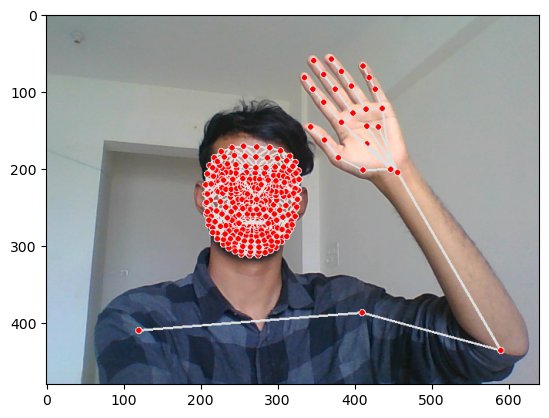

In [7]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [8]:
#ARRAY CREATION

In [9]:
len(results.left_hand_landmarks.landmark)

21

In [10]:
results.face_landmarks

landmark {
  x: 0.4195881485939026
  y: 0.5560845732688904
  z: -0.026113996282219887
}
landmark {
  x: 0.4218132495880127
  y: 0.5199462175369263
  z: -0.04453163966536522
}
landmark {
  x: 0.42059603333473206
  y: 0.5323466658592224
  z: -0.024110283702611923
}
landmark {
  x: 0.41579926013946533
  y: 0.4817439317703247
  z: -0.032256193459033966
}
landmark {
  x: 0.4224160313606262
  y: 0.5077662467956543
  z: -0.04694719985127449
}
landmark {
  x: 0.42285117506980896
  y: 0.4924662411212921
  z: -0.0431828610599041
}
landmark {
  x: 0.42347270250320435
  y: 0.45713523030281067
  z: -0.019176773726940155
}
landmark {
  x: 0.36204707622528076
  y: 0.45341479778289795
  z: 0.01151706650853157
}
landmark {
  x: 0.4244508743286133
  y: 0.43096500635147095
  z: -0.012952553108334541
}
landmark {
  x: 0.4253217279911041
  y: 0.41534993052482605
  z: -0.014214756898581982
}
landmark {
  x: 0.4274817109107971
  y: 0.3589729070663452
  z: -0.002982299542054534
}
landmark {
  x: 0.41927334666

In [11]:
results.pose_landmarks.landmark[0].y


0.5019441843032837

In [12]:
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])

In [13]:
test

array([3.88528556e-01, 3.11500859e+00, 2.58209050e-01, 1.06152220e-04])

In [14]:
#we can do it in a loop like below or list comprehension

In [15]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [16]:
#list comprehension # np.zeros(21*3) 21 landmarks saw above and 3 corrdinates

In [17]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [18]:
if results.face_landmarks :
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
else :
    np.zeros(1404)


In [19]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [20]:
result_test = extract_keypoints(results)

In [21]:
result_test.shape

(1662,)

In [22]:
result_test

array([ 0.42803302,  0.50194418, -0.8668617 , ...,  0.        ,
        0.        ,  0.        ])

In [23]:
np.save('0', result_test)

In [24]:
np.load('0.npy')

array([ 0.42803302,  0.50194418, -0.8668617 , ...,  0.        ,
        0.        ,  0.        ])

In [25]:
DATA_PATH = os.path.join('MP_Data') 
actions = np.array(['hello', 'thanks', 'iloveyou'])
no_sequences = 30
sequence_length = 30

In [26]:
#30 videos/sequences ,each will have 30 frames in length , each with 3 actions , multipled by 1662 keypoints

In [27]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [28]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    for action in actions:

        for sequence in range(no_sequences):

            for frame_num in range(sequence_length):

                ret, frame = cap.read()

                image, results = mediapipe_detection(frame, holistic)

                draw_styled_landmarks(image, results)

                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                    cv2.imshow('OpenCV Feed', image)

                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [29]:
cap.release()
cv2.destroyAllWindows()

In [30]:
from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import to_categorical #convert data to one hot encoded data
label_map = {label:num for num, label in enumerate(actions)} #dictionary for labels/words with integers
#set of labels which represent these diff id's  hello thanks and luv  for different train and test data

In [31]:
label_map #90 arrays with 30 frames in each one w 1662 in each

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [32]:
sequences, labels = [], [] #blank arrays for feature data X data and label daata Y data
for action in actions:
    for sequence in range(no_sequences): #video no
        window = [] #all frames can be represented in a seqence in this window
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))) #path and frame number ,grab frame 1 add it to the window add 2 and so on
            window.append(res)
        sequences.append(window) #our sequence array will have 90 video represented in each will be 30 frames each
        labels.append(label_map[action])

In [33]:
np.array(sequences).shape #90 videos with 30 frames each with 1662 capture points

(90, 30, 1662)

In [34]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [35]:
np.array(labels).shape

(90,)

In [36]:
X = np.array(sequences)

In [37]:
X.shape

(90, 30, 1662)

In [38]:
y = to_categorical(labels).astype(int) #inital numbers/labels which where just 1,2 ,0 to one hot encoded representation ,its just like a binary flag

In [39]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05) #test partition is 5% of our data

In [41]:
X_train.shape

(85, 30, 1662)

In [42]:
y_train.shape

(85, 3)

In [43]:
X_test.shape

(5, 30, 1662)

In [44]:
y_test.shape

(5, 3)

In [45]:
from tensorflow.keras.models import Sequential #sequential neural network
from tensorflow.keras.layers import LSTM, Dense #temorary component ,dense is fully connected layer 
from tensorflow.keras.callbacks import TensorBoard #this is for the log directory which can be run at tensorboard

In [46]:
log_dir = os.path.join('Logs') #log folder 
tb_callback = TensorBoard(log_dir=log_dir)

In [47]:
#andrew ing was a god in this ,64 128 neurons
model = Sequential() #api, just adding a bunch of layers for each 
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662))) #true cuz next layer will use it ,
#with a activation component and a basic shape 30 frames x 1662 values which is x .shape last two array points
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax')) #return activation will be 0 to 1 with sum of all values adding upto 1

In [48]:
#actions.shape[0]

In [49]:
#res = [.7, 0.2, 0.1] why would it besoft max cuz andrew ing said so his in his lecture , lmao numaan can change this but it will require complete tensor flow

In [50]:
#models right now use no of cnn layers/pre tained mobile net with lstm layers ,30 x3 class 90 sequences will give no level of accuracy
#cuz of numaan being lazy and has less data with just 3 sequences and we have to create a hyper accurate model
#much denser neural network 30-50 million parameters go right up to 0.5 million parameters now 
#now 1.5 million netowrk was very much simplar so it was fast
#also back then i was working on my mac and it worked well okay but due to introduction of media pipe
#my venture strted lossing its value

In [51]:
res = [.7, 0.2, 0.1]

In [52]:
#actions[np.argmax(res)]

In [54]:
actions[np.argmax(res)]

'hello'

In [55]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy']) 
#adam is easiest one on windows cuz my ram and gpu levels are low in respect to produff version and cudda cunn
#categorical multi class not a binary its not a binary crossentropy this took me a lot of time to think of


In [56]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 4s 125ms/step - loss: 1.7289 - categorical_accuracy: 0.3765
Epoch 2/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.9724 - categorical_accuracy: 0.4235
Epoch 3/2000
3/3 [==============================] - 0s 102ms/step - loss: 2.3570 - categorical_accuracy: 0.3882
Epoch 4/2000
3/3 [==============================] - 0s 125ms/step - loss: 2.7270 - categorical_accuracy: 0.2118
Epoch 5/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.0937 - categorical_accuracy: 0.3529
Epoch 6/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.2394 - categorical_accuracy: 0.3294
Epoch 7/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.1519 - categorical_accuracy: 0.3412
Epoch 8/2000
3/3 [==============================] - 0s 110ms/step - loss: 1.0191 - categorical_accuracy: 0.4706
Epoch 9/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.0007 - categorical_accuracy:

3/3 [==============================] - 0s 78ms/step - loss: 0.3034 - categorical_accuracy: 0.8941
Epoch 74/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.2619 - categorical_accuracy: 0.8941
Epoch 75/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.2139 - categorical_accuracy: 0.9176
Epoch 76/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.1852 - categorical_accuracy: 0.9412
Epoch 77/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.1806 - categorical_accuracy: 0.9294
Epoch 78/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.3678 - categorical_accuracy: 0.8941
Epoch 79/2000
3/3 [==============================] - 0s 94ms/step - loss: 2.0374 - categorical_accuracy: 0.6824
Epoch 80/2000
3/3 [==============================] - 0s 94ms/step - loss: 2.8619 - categorical_accuracy: 0.4706
Epoch 81/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.9309 - categorical_accuracy: 0.3176
Epoch 

3/3 [==============================] - 0s 78ms/step - loss: 1.0823 - categorical_accuracy: 0.3294
Epoch 146/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.0809 - categorical_accuracy: 0.3294
Epoch 147/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0793 - categorical_accuracy: 0.3294
Epoch 148/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.0781 - categorical_accuracy: 0.3059
Epoch 149/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.0737 - categorical_accuracy: 0.3294
Epoch 150/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.0690 - categorical_accuracy: 0.3529
Epoch 151/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.0577 - categorical_accuracy: 0.3412
Epoch 152/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.0291 - categorical_accuracy: 0.3412
Epoch 153/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.0003 - categorical_accuracy: 0.411

3/3 [==============================] - 0s 110ms/step - loss: 0.8085 - categorical_accuracy: 0.3529
Epoch 218/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.8006 - categorical_accuracy: 0.3529
Epoch 219/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.7910 - categorical_accuracy: 0.3882
Epoch 220/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.7739 - categorical_accuracy: 0.5412
Epoch 221/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.7359 - categorical_accuracy: 0.6706
Epoch 222/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.7262 - categorical_accuracy: 0.6706
Epoch 223/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.7274 - categorical_accuracy: 0.6588
Epoch 224/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.7384 - categorical_accuracy: 0.6235
Epoch 225/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.7237 - categorical_accurac

3/3 [==============================] - 0s 86ms/step - loss: 1.0821 - categorical_accuracy: 0.3882
Epoch 290/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0987 - categorical_accuracy: 0.3412
Epoch 291/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.0957 - categorical_accuracy: 0.3412
Epoch 292/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.0859 - categorical_accuracy: 0.3412
Epoch 293/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.0823 - categorical_accuracy: 0.3765
Epoch 294/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.0838 - categorical_accuracy: 0.3294
Epoch 295/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.0805 - categorical_accuracy: 0.3647
Epoch 296/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.0720 - categorical_accuracy: 0.3765
Epoch 297/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.0652 - categorical_accuracy: 0

3/3 [==============================] - 0s 102ms/step - loss: 0.2436 - categorical_accuracy: 0.9059
Epoch 362/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.2480 - categorical_accuracy: 0.8941
Epoch 363/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.2573 - categorical_accuracy: 0.8706
Epoch 364/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.3988 - categorical_accuracy: 0.8118
Epoch 365/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.4489 - categorical_accuracy: 0.8235
Epoch 366/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.4467 - categorical_accuracy: 0.7529
Epoch 367/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.3142 - categorical_accuracy: 0.8706
Epoch 368/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.2255 - categorical_accuracy: 0.9529
Epoch 369/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.2989 - categorical_accuracy:

3/3 [==============================] - 0s 78ms/step - loss: 0.1686 - categorical_accuracy: 0.9412
Epoch 434/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.1189 - categorical_accuracy: 0.9765
Epoch 435/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.1115 - categorical_accuracy: 0.9765
Epoch 436/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.1074 - categorical_accuracy: 0.9529
Epoch 437/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.0901 - categorical_accuracy: 0.9765
Epoch 438/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0834 - categorical_accuracy: 0.9765
Epoch 439/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.1248 - categorical_accuracy: 0.9412
Epoch 440/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.1975 - categorical_accuracy: 0.9176
Epoch 441/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.1220 - categorical_accuracy: 0.94

3/3 [==============================] - 0s 117ms/step - loss: 0.0078 - categorical_accuracy: 1.0000
Epoch 506/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0099 - categorical_accuracy: 1.0000
Epoch 507/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0062 - categorical_accuracy: 1.0000
Epoch 508/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.0063 - categorical_accuracy: 1.0000
Epoch 509/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.0043 - categorical_accuracy: 1.0000
Epoch 510/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0048 - categorical_accuracy: 1.0000
Epoch 511/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.0035 - categorical_accuracy: 1.0000
Epoch 512/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0037 - categorical_accuracy: 1.0000
Epoch 513/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0030 - categorical_accuracy:

3/3 [==============================] - 0s 94ms/step - loss: 2.5444e-04 - categorical_accuracy: 1.0000
Epoch 576/2000
3/3 [==============================] - 0s 94ms/step - loss: 2.5857e-04 - categorical_accuracy: 1.0000
Epoch 577/2000
3/3 [==============================] - 0s 110ms/step - loss: 2.4616e-04 - categorical_accuracy: 1.0000
Epoch 578/2000
3/3 [==============================] - 0s 109ms/step - loss: 2.2975e-04 - categorical_accuracy: 1.0000
Epoch 579/2000
3/3 [==============================] - 0s 94ms/step - loss: 2.3042e-04 - categorical_accuracy: 1.0000
Epoch 580/2000
3/3 [==============================] - 0s 94ms/step - loss: 2.3509e-04 - categorical_accuracy: 1.0000
Epoch 581/2000
3/3 [==============================] - 0s 110ms/step - loss: 2.2217e-04 - categorical_accuracy: 1.0000
Epoch 582/2000
3/3 [==============================] - 0s 98ms/step - loss: 2.1224e-04 - categorical_accuracy: 1.0000
Epoch 583/2000
3/3 [==============================] - 0s 111ms/step - loss: 

3/3 [==============================] - 0s 117ms/step - loss: 7.5910e-05 - categorical_accuracy: 1.0000
Epoch 645/2000
3/3 [==============================] - 0s 94ms/step - loss: 7.6630e-05 - categorical_accuracy: 1.0000
Epoch 646/2000
3/3 [==============================] - 0s 119ms/step - loss: 7.4270e-05 - categorical_accuracy: 1.0000
Epoch 647/2000
3/3 [==============================] - 0s 134ms/step - loss: 7.2347e-05 - categorical_accuracy: 1.0000
Epoch 648/2000
3/3 [==============================] - 0s 120ms/step - loss: 7.2354e-05 - categorical_accuracy: 1.0000
Epoch 649/2000
3/3 [==============================] - 0s 130ms/step - loss: 6.9944e-05 - categorical_accuracy: 1.0000
Epoch 650/2000
3/3 [==============================] - 0s 115ms/step - loss: 6.9025e-05 - categorical_accuracy: 1.0000
Epoch 651/2000
3/3 [==============================] - 0s 106ms/step - loss: 6.8027e-05 - categorical_accuracy: 1.0000
Epoch 652/2000
3/3 [==============================] - 0s 118ms/step - lo

3/3 [==============================] - 0s 110ms/step - loss: 2.9718e-05 - categorical_accuracy: 1.0000
Epoch 714/2000
3/3 [==============================] - 0s 110ms/step - loss: 2.9241e-05 - categorical_accuracy: 1.0000
Epoch 715/2000
3/3 [==============================] - 0s 109ms/step - loss: 2.8931e-05 - categorical_accuracy: 1.0000
Epoch 716/2000
3/3 [==============================] - 0s 110ms/step - loss: 2.8450e-05 - categorical_accuracy: 1.0000
Epoch 717/2000
3/3 [==============================] - 0s 117ms/step - loss: 2.8051e-05 - categorical_accuracy: 1.0000
Epoch 718/2000
3/3 [==============================] - 0s 117ms/step - loss: 2.7697e-05 - categorical_accuracy: 1.0000
Epoch 719/2000
3/3 [==============================] - 0s 117ms/step - loss: 2.7761e-05 - categorical_accuracy: 1.0000
Epoch 720/2000
3/3 [==============================] - 0s 117ms/step - loss: 2.7429e-05 - categorical_accuracy: 1.0000
Epoch 721/2000
3/3 [==============================] - 0s 94ms/step - lo

3/3 [==============================] - 0s 94ms/step - loss: 1.4616e-05 - categorical_accuracy: 1.0000
Epoch 783/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.4492e-05 - categorical_accuracy: 1.0000
Epoch 784/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.4247e-05 - categorical_accuracy: 1.0000
Epoch 785/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.4061e-05 - categorical_accuracy: 1.0000
Epoch 786/2000
3/3 [==============================] - 0s 110ms/step - loss: 1.4167e-05 - categorical_accuracy: 1.0000
Epoch 787/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.4024e-05 - categorical_accuracy: 1.0000
Epoch 788/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.3827e-05 - categorical_accuracy: 1.0000
Epoch 789/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.3738e-05 - categorical_accuracy: 1.0000
Epoch 790/2000
3/3 [==============================] - 0s 102ms/step - loss

3/3 [==============================] - 0s 94ms/step - loss: 8.2529e-06 - categorical_accuracy: 1.0000
Epoch 852/2000
3/3 [==============================] - 0s 95ms/step - loss: 8.1758e-06 - categorical_accuracy: 1.0000
Epoch 853/2000
3/3 [==============================] - 0s 110ms/step - loss: 8.1239e-06 - categorical_accuracy: 1.0000
Epoch 854/2000
3/3 [==============================] - 0s 110ms/step - loss: 8.0678e-06 - categorical_accuracy: 1.0000
Epoch 855/2000
3/3 [==============================] - 0s 109ms/step - loss: 8.0160e-06 - categorical_accuracy: 1.0000
Epoch 856/2000
3/3 [==============================] - 0s 110ms/step - loss: 7.9809e-06 - categorical_accuracy: 1.0000
Epoch 857/2000
3/3 [==============================] - 0s 109ms/step - loss: 7.9346e-06 - categorical_accuracy: 1.0000
Epoch 858/2000
3/3 [==============================] - 0s 110ms/step - loss: 7.8715e-06 - categorical_accuracy: 1.0000
Epoch 859/2000
3/3 [==============================] - 0s 94ms/step - loss

3/3 [==============================] - 0s 94ms/step - loss: 5.3306e-06 - categorical_accuracy: 1.0000
Epoch 921/2000
3/3 [==============================] - 0s 94ms/step - loss: 5.3165e-06 - categorical_accuracy: 1.0000
Epoch 922/2000
3/3 [==============================] - 0s 102ms/step - loss: 5.2660e-06 - categorical_accuracy: 1.0000
Epoch 923/2000
3/3 [==============================] - 0s 102ms/step - loss: 5.2436e-06 - categorical_accuracy: 1.0000
Epoch 924/2000
3/3 [==============================] - 0s 102ms/step - loss: 5.2184e-06 - categorical_accuracy: 1.0000
Epoch 925/2000
3/3 [==============================] - 0s 110ms/step - loss: 5.1889e-06 - categorical_accuracy: 1.0000
Epoch 926/2000
3/3 [==============================] - 0s 109ms/step - loss: 5.1497e-06 - categorical_accuracy: 1.0000
Epoch 927/2000
3/3 [==============================] - 0s 102ms/step - loss: 5.1160e-06 - categorical_accuracy: 1.0000
Epoch 928/2000
3/3 [==============================] - 0s 109ms/step - los

3/3 [==============================] - 0s 102ms/step - loss: 3.7206e-06 - categorical_accuracy: 1.0000
Epoch 990/2000
3/3 [==============================] - 0s 94ms/step - loss: 3.7080e-06 - categorical_accuracy: 1.0000
Epoch 991/2000
3/3 [==============================] - 0s 109ms/step - loss: 3.6884e-06 - categorical_accuracy: 1.0000
Epoch 992/2000
3/3 [==============================] - 0s 117ms/step - loss: 3.6702e-06 - categorical_accuracy: 1.0000
Epoch 993/2000
3/3 [==============================] - 0s 102ms/step - loss: 3.6659e-06 - categorical_accuracy: 1.0000
Epoch 994/2000
3/3 [==============================] - 0s 110ms/step - loss: 3.6309e-06 - categorical_accuracy: 1.0000
Epoch 995/2000
3/3 [==============================] - 0s 102ms/step - loss: 3.6169e-06 - categorical_accuracy: 1.0000
Epoch 996/2000
3/3 [==============================] - 0s 117ms/step - loss: 3.6028e-06 - categorical_accuracy: 1.0000
Epoch 997/2000
3/3 [==============================] - 0s 117ms/step - lo

3/3 [==============================] - 0s 92ms/step - loss: 2.7179e-06 - categorical_accuracy: 1.0000
Epoch 1059/2000
3/3 [==============================] - 0s 86ms/step - loss: 2.7039e-06 - categorical_accuracy: 1.0000
Epoch 1060/2000
3/3 [==============================] - 0s 86ms/step - loss: 2.6899e-06 - categorical_accuracy: 1.0000
Epoch 1061/2000
3/3 [==============================] - 0s 98ms/step - loss: 2.6829e-06 - categorical_accuracy: 1.0000
Epoch 1062/2000
3/3 [==============================] - 0s 85ms/step - loss: 2.6688e-06 - categorical_accuracy: 1.0000
Epoch 1063/2000
3/3 [==============================] - 0s 86ms/step - loss: 2.6562e-06 - categorical_accuracy: 1.0000
Epoch 1064/2000
3/3 [==============================] - 0s 78ms/step - loss: 2.6506e-06 - categorical_accuracy: 1.0000
Epoch 1065/2000
3/3 [==============================] - 0s 70ms/step - loss: 2.6352e-06 - categorical_accuracy: 1.0000
Epoch 1066/2000
3/3 [==============================] - 0s 86ms/step - lo

3/3 [==============================] - 0s 109ms/step - loss: 2.0504e-06 - categorical_accuracy: 1.0000
Epoch 1128/2000
3/3 [==============================] - 0s 102ms/step - loss: 2.0420e-06 - categorical_accuracy: 1.0000
Epoch 1129/2000
3/3 [==============================] - 0s 109ms/step - loss: 2.0321e-06 - categorical_accuracy: 1.0000
Epoch 1130/2000
3/3 [==============================] - 0s 110ms/step - loss: 2.0223e-06 - categorical_accuracy: 1.0000
Epoch 1131/2000
3/3 [==============================] - 0s 110ms/step - loss: 2.0153e-06 - categorical_accuracy: 1.0000
Epoch 1132/2000
3/3 [==============================] - 0s 109ms/step - loss: 2.0055e-06 - categorical_accuracy: 1.0000
Epoch 1133/2000
3/3 [==============================] - 0s 125ms/step - loss: 2.0027e-06 - categorical_accuracy: 1.0000
Epoch 1134/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.9943e-06 - categorical_accuracy: 1.0000
Epoch 1135/2000
3/3 [==============================] - 0s 110ms/s

3/3 [==============================] - 0s 118ms/step - loss: 1.5946e-06 - categorical_accuracy: 1.0000
Epoch 1197/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.5862e-06 - categorical_accuracy: 1.0000
Epoch 1198/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.5820e-06 - categorical_accuracy: 1.0000
Epoch 1199/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.5778e-06 - categorical_accuracy: 1.0000
Epoch 1200/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.5707e-06 - categorical_accuracy: 1.0000
Epoch 1201/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.5651e-06 - categorical_accuracy: 1.0000
Epoch 1202/2000
3/3 [==============================] - 0s 110ms/step - loss: 1.5567e-06 - categorical_accuracy: 1.0000
Epoch 1203/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.5553e-06 - categorical_accuracy: 1.0000
Epoch 1204/2000
3/3 [==============================] - 0s 109ms/s

3/3 [==============================] - 0s 110ms/step - loss: 1.2622e-06 - categorical_accuracy: 1.0000
Epoch 1266/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.2594e-06 - categorical_accuracy: 1.0000
Epoch 1267/2000
3/3 [==============================] - 0s 110ms/step - loss: 1.2510e-06 - categorical_accuracy: 1.0000
Epoch 1268/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.2510e-06 - categorical_accuracy: 1.0000
Epoch 1269/2000
3/3 [==============================] - 0s 133ms/step - loss: 1.2482e-06 - categorical_accuracy: 1.0000
Epoch 1270/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.2440e-06 - categorical_accuracy: 1.0000
Epoch 1271/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.2384e-06 - categorical_accuracy: 1.0000
Epoch 1272/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.2370e-06 - categorical_accuracy: 1.0000
Epoch 1273/2000
3/3 [==============================] - 0s 117ms/

3/3 [==============================] - 0s 94ms/step - loss: 1.0224e-06 - categorical_accuracy: 1.0000
Epoch 1335/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.0182e-06 - categorical_accuracy: 1.0000
Epoch 1336/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.0154e-06 - categorical_accuracy: 1.0000
Epoch 1337/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0154e-06 - categorical_accuracy: 1.0000
Epoch 1338/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.0112e-06 - categorical_accuracy: 1.0000
Epoch 1339/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.0098e-06 - categorical_accuracy: 1.0000
Epoch 1340/2000
3/3 [==============================] - 0s 110ms/step - loss: 1.0070e-06 - categorical_accuracy: 1.0000
Epoch 1341/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.0056e-06 - categorical_accuracy: 1.0000
Epoch 1342/2000
3/3 [==============================] - 0s 117ms/st

3/3 [==============================] - 0s 110ms/step - loss: 8.4989e-07 - categorical_accuracy: 1.0000
Epoch 1404/2000
3/3 [==============================] - 0s 110ms/step - loss: 8.4568e-07 - categorical_accuracy: 1.0000
Epoch 1405/2000
3/3 [==============================] - 0s 117ms/step - loss: 8.4428e-07 - categorical_accuracy: 1.0000
Epoch 1406/2000
3/3 [==============================] - 0s 125ms/step - loss: 8.4428e-07 - categorical_accuracy: 1.0000
Epoch 1407/2000
3/3 [==============================] - 0s 94ms/step - loss: 8.4007e-07 - categorical_accuracy: 1.0000
Epoch 1408/2000
3/3 [==============================] - 0s 117ms/step - loss: 8.3726e-07 - categorical_accuracy: 1.0000
Epoch 1409/2000
3/3 [==============================] - 0s 94ms/step - loss: 8.3586e-07 - categorical_accuracy: 1.0000
Epoch 1410/2000
3/3 [==============================] - 0s 109ms/step - loss: 8.3446e-07 - categorical_accuracy: 1.0000
Epoch 1411/2000
3/3 [==============================] - 0s 117ms/st

3/3 [==============================] - 0s 133ms/step - loss: 7.0964e-07 - categorical_accuracy: 1.0000
Epoch 1473/2000
3/3 [==============================] - 0s 135ms/step - loss: 7.0684e-07 - categorical_accuracy: 1.0000
Epoch 1474/2000
3/3 [==============================] - 0s 142ms/step - loss: 7.0543e-07 - categorical_accuracy: 1.0000
Epoch 1475/2000
3/3 [==============================] - 0s 104ms/step - loss: 7.0403e-07 - categorical_accuracy: 1.0000
Epoch 1476/2000
3/3 [==============================] - 0s 102ms/step - loss: 7.0123e-07 - categorical_accuracy: 1.0000
Epoch 1477/2000
3/3 [==============================] - 0s 101ms/step - loss: 6.9983e-07 - categorical_accuracy: 1.0000
Epoch 1478/2000
3/3 [==============================] - 0s 109ms/step - loss: 6.9842e-07 - categorical_accuracy: 1.0000
Epoch 1479/2000
3/3 [==============================] - 0s 94ms/step - loss: 6.9702e-07 - categorical_accuracy: 1.0000
Epoch 1480/2000
3/3 [==============================] - 0s 117ms/s

3/3 [==============================] - 0s 86ms/step - loss: 5.9324e-07 - categorical_accuracy: 1.0000
Epoch 1542/2000
3/3 [==============================] - 0s 87ms/step - loss: 5.9043e-07 - categorical_accuracy: 1.0000
Epoch 1543/2000
3/3 [==============================] - 0s 82ms/step - loss: 5.9043e-07 - categorical_accuracy: 1.0000
Epoch 1544/2000
3/3 [==============================] - 0s 82ms/step - loss: 5.8623e-07 - categorical_accuracy: 1.0000
Epoch 1545/2000
3/3 [==============================] - 0s 78ms/step - loss: 5.8482e-07 - categorical_accuracy: 1.0000
Epoch 1546/2000
3/3 [==============================] - 0s 86ms/step - loss: 5.8482e-07 - categorical_accuracy: 1.0000
Epoch 1547/2000
3/3 [==============================] - 0s 86ms/step - loss: 5.8202e-07 - categorical_accuracy: 1.0000
Epoch 1548/2000
3/3 [==============================] - 0s 86ms/step - loss: 5.8202e-07 - categorical_accuracy: 1.0000
Epoch 1549/2000
3/3 [==============================] - 0s 86ms/step - lo

KeyboardInterrupt: 

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

In [58]:
res = model.predict(X_test)

In [73]:
actions[np.argmax(res[2])]

'hello'

In [74]:
actions[np.argmax(y_test[2])]

'hello'

In [61]:
model.save('action.h5')

In [62]:
model.load_weights('action.h5')

In [63]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [64]:
yhat = model.predict(X_test)

In [65]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [66]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [1, 2]],

       [[4, 0],
        [0, 1]],

       [[3, 1],
        [0, 1]]], dtype=int64)

In [67]:
accuracy_score(ytrue, yhat)

0.8

In [68]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [69]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [71]:
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)  
        # Draw landmarks
        draw_styled_landmarks(image, results)
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])      
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]
            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)        
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'media

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
res[np.argmax(res)] > threshold

In [ ]:
(num_sequences,30,1662)

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))